In [26]:
# Import necessary libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# 1. Read Data

In [2]:
data = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


It appears that the Serial No. column serves as the row index, and can therefore be removed. 
As for the SOP and LOR columns, they stand for Statement of Purpose (SOP) and Letter of Recommendation (LOR).
These columns show how good the applicants' Statement of Purpose and Letter of Recommendation are.
The University Rating indicates the tier of the university where applicants belong.

In [5]:
# Drop Serial No. column
data = data.drop('Serial No.', axis=1)

In [6]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


# 2. Data Analysis

<AxesSubplot:>

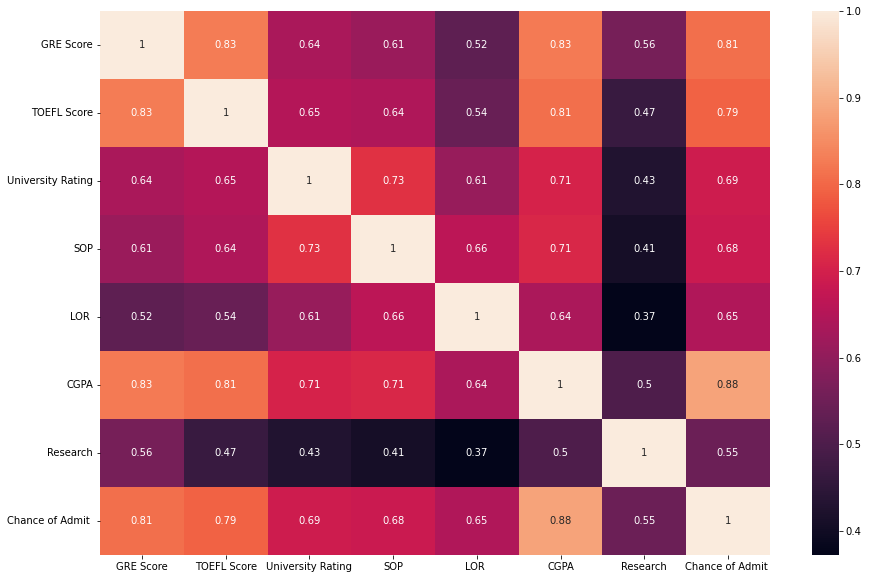

In [25]:
# Pearson Correlation
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True)

In [42]:
# See features with high correlation (>0.8) 

high_corr_pairs = np.where(np.abs(data.drop(columns=['Chance of Admit ']).corr()) > 0.8)

for i,j in zip(*high_corr_pairs):
    if i < j:
        print(f"{data.columns[i]} and {data.columns[j]} have correlation {data.corr().iloc[i,j]}") 


GRE Score and TOEFL Score have correlation 0.8272004035317205
GRE Score and CGPA have correlation 0.8258779536403557
TOEFL Score and CGPA have correlation 0.8105735363036219
